In [46]:
import numpy as np
import matplotlib.pyplot as plt
import hdf5storage
import torch
test_x = torch.from_numpy(hdf5storage.loadmat('./data/PDvsNC/datas/test_PDvsNC_x_1.mat')['x'])
print(test_x.shape)
test_x = test_x.squeeze(1)  # 形状变为(5, 128, 128, 128)
data = test_x[0]  # 第一个样本
# data = data.permute(1,0,2)

torch.Size([178, 1, 128, 128, 128])


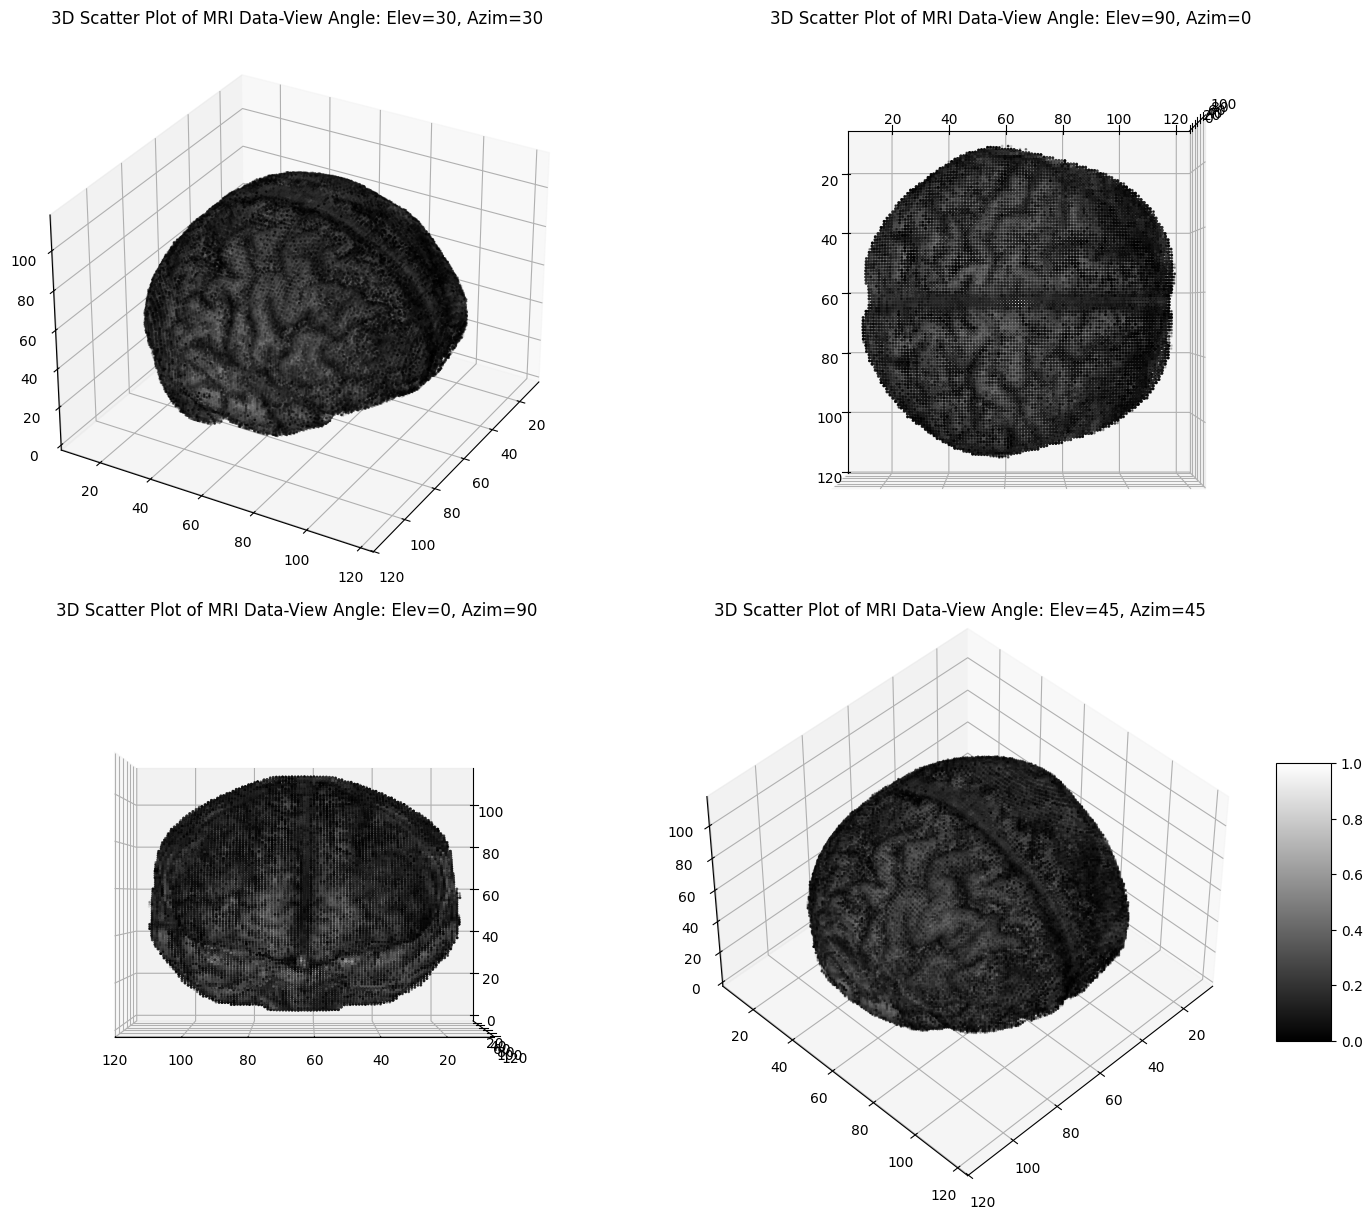

In [51]:

x, y, z = np.where(data > 0.1)

values = data[x, y, z].cpu().numpy()
norm_values = (values - np.min(values)) / (np.max(values) - np.min(values))
alpha_values = norm_values  # 将透明度设置为归一化后的值

view_angles = [
    (30, 30),  # 俯视角度
    (90, 0),   # 正面
    (0, 90),   # 侧面
    (45, 45),  # 对角线
]

fig = plt.figure(figsize=(15, 12))

for i, (elev, azim) in enumerate(view_angles):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    
    # 使用灰度（normalized values）来控制点的颜色和透明度
    scatter = ax.scatter(x, y, z, c=norm_values, cmap='gray', marker='o', s=1, alpha=alpha_values)  # 每个点的透明度由 alpha_values 控制
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"3D Scatter Plot of MRI Data-View Angle: Elev={elev}, Azim={azim}")

# 添加颜色条
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

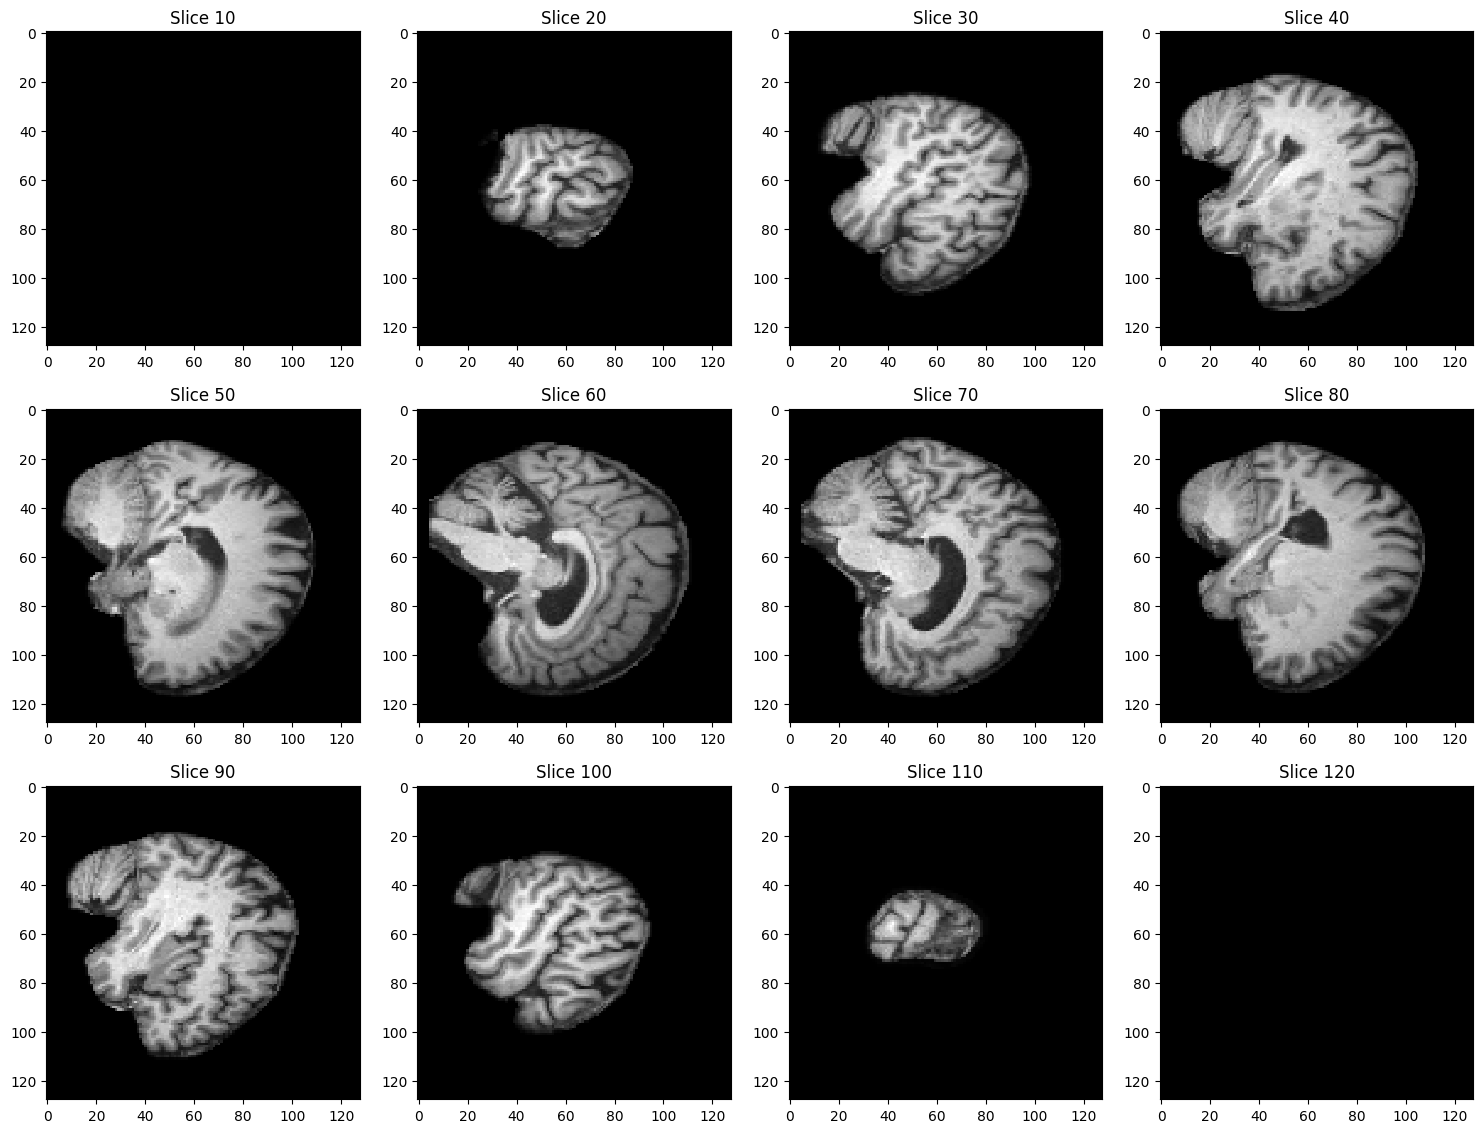

In [42]:
fig = plt.figure(figsize=(15, 15))
for i in range(10, 128, 10):
    ax = fig.add_subplot(4, 4, i//10)
    ax.imshow(data[i,:, :], cmap='gray', interpolation='nearest')
    ax.set_title(f'Slice {i}')
    ax.axis('on')
plt.tight_layout()
plt.show()
# 第一个轴方向是矢状面（Sagittal）的MRI， 在Vision transformer里面作为frame， 是否合适呢？

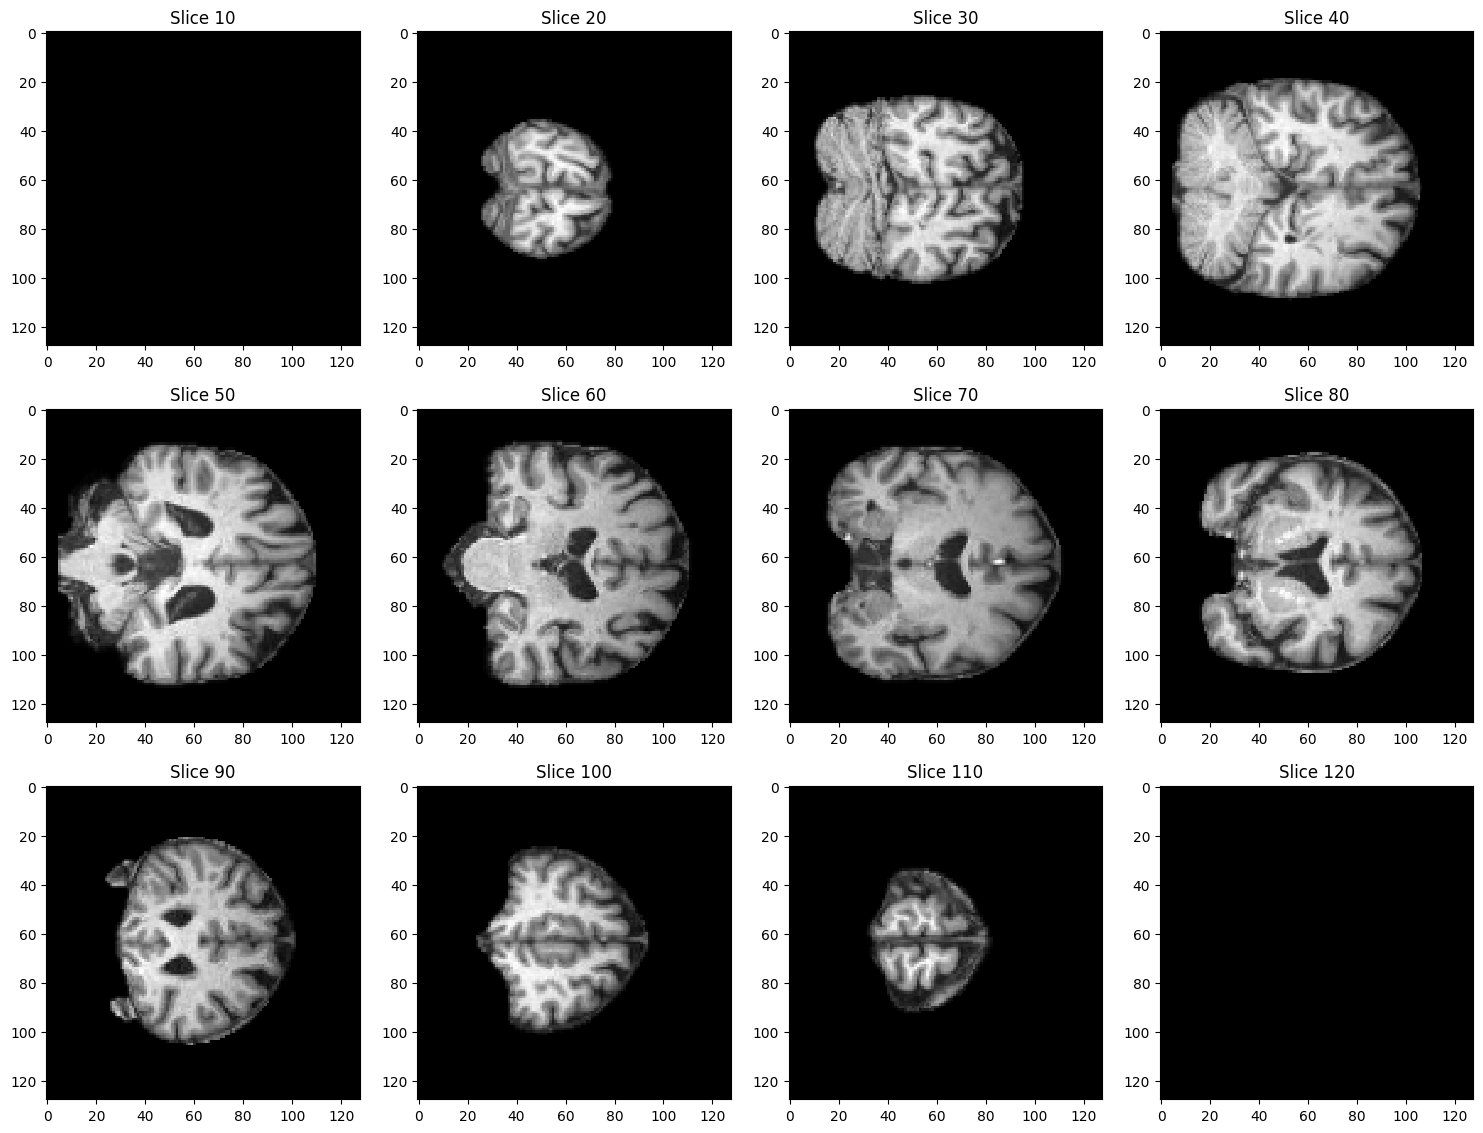

In [43]:
fig = plt.figure(figsize=(15, 15))
for i in range(10, 121, 10):
    ax = fig.add_subplot(4, 4, i//10)
    ax.imshow(data[:, i, :], cmap='gray', interpolation='nearest')
    ax.set_title(f'Slice {i}')
    ax.axis('on')
plt.tight_layout()
plt.show()
#第二个维度是冠状面

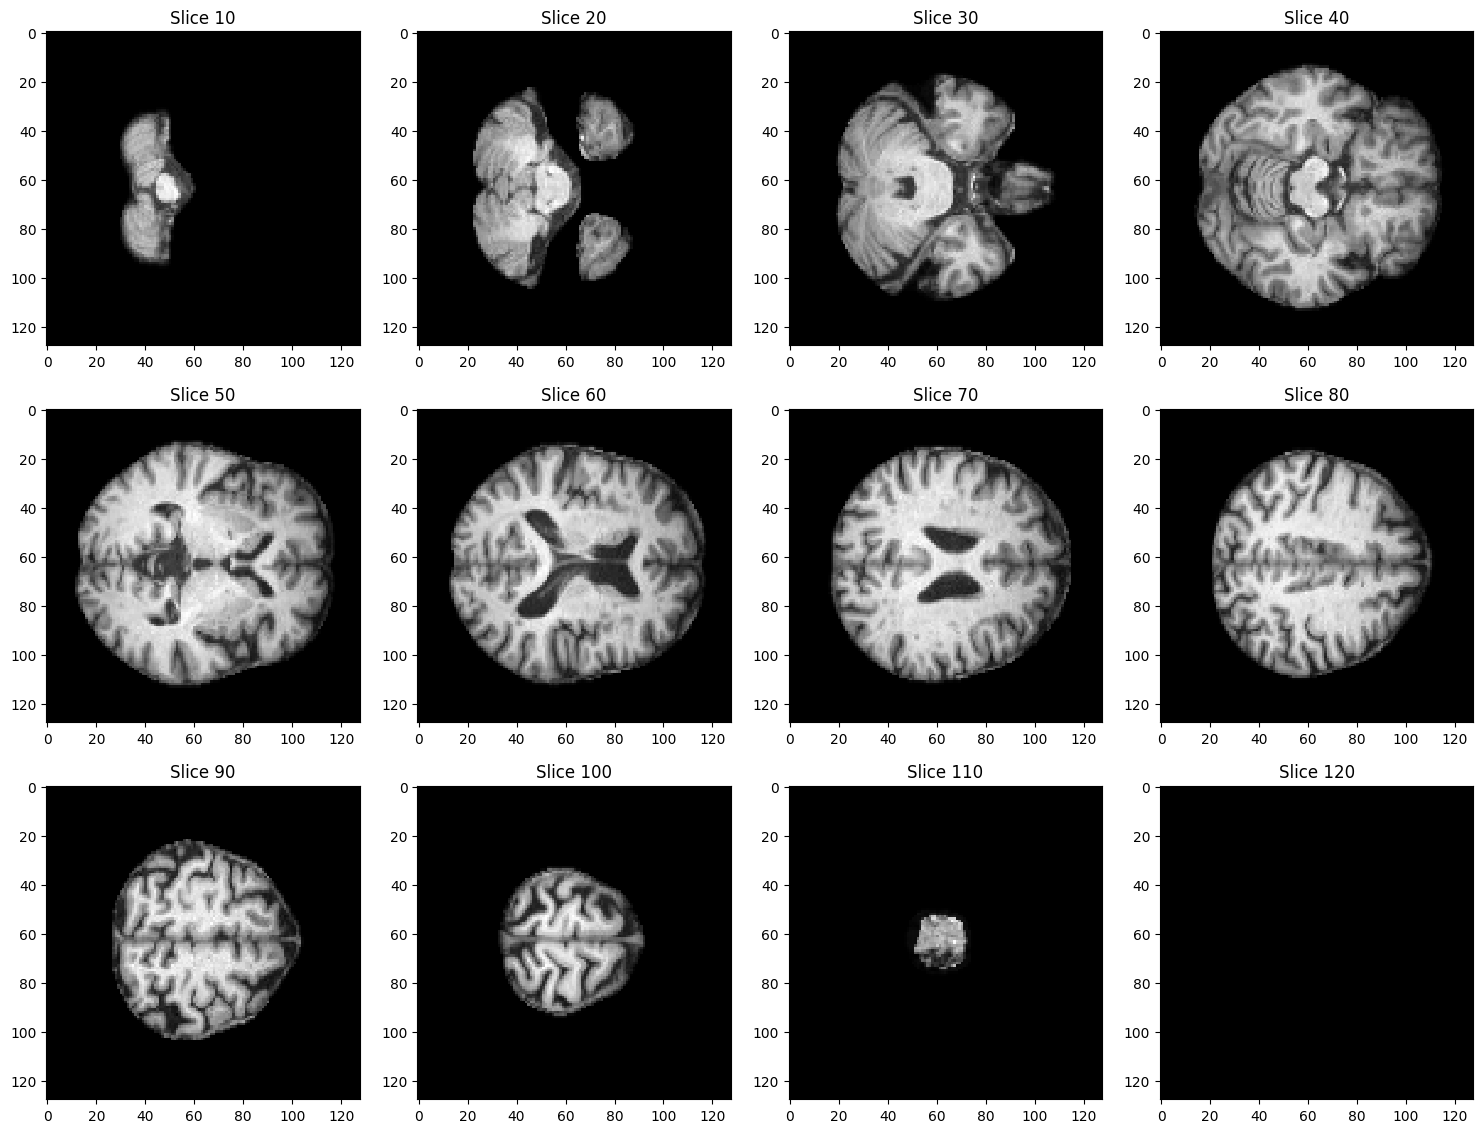

In [44]:
fig = plt.figure(figsize=(15, 15))
for i in range(10, 128, 10):
    ax = fig.add_subplot(4, 4, i//10)
    ax.imshow(data[:, :, i], cmap='gray', interpolation='nearest')
    ax.set_title(f'Slice {i}')
    ax.axis('on')
plt.tight_layout()
plt.show()
# 第三个维度是横断面， 轴向（Axial)